# Question 1

The file `resale_flat_prices.csv` contains resale flat prices in Singapore from January 2017 onwards. The file `town_type_region.xlsx` contains the classification of each town as *mature* or *non-mature* and each town's geographical region (*north*, *north-east*, *east*, *west*, or *central*). Use these two files to answer the following questions:

1. In the period January 2022 to June 2022, was the mean resale price **per square metre per year of remaining lease** of 4 ROOM flats the same for all geographical regions?
2. In the period July 2022 to December 2022, was there any difference in the distribution of geographical regions for each resale flat type? (Please **omit** 1 ROOM and MULTI-GENERATION flats from this analysis.)

It is up to you to choose the appropriate hypothesis test, and to perform the five steps for each question.

**Answer**:

**Question 1.1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from myscripts import inference

In [2]:
price=pd.read_csv('../data/resale_flat_prices.csv', header = 0, na_values = 'NA')
tyreg=pd.read_excel('../data/town_type_region.xlsx', header = 0, na_values = 'NA')
data_total=pd.merge(price,tyreg,on='town')

In [3]:
room_4=data_total[(data_total['flat_type']=='4 ROOM')&(data_total['month']>='2022-01')&(data_total['month']<='2022-06')]
y=room_4['remaining_lease'].str[:2]
m=room_4['remaining_lease'].str[9:11]
m1=pd.to_numeric(m)
month=m1.fillna(0)
years=pd.to_numeric(y)+month/12
room_4.loc[:,'price_sm_remaining_lease']=room_4.resale_price/room_4.floor_area_sqm/years
room_4

C:\Users\Allen's\AppData\Local\Temp/ipykernel_12012/2747329838.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room_4.loc[:,'price_sm_remaining_lease']=room_4.resale_price/room_4.floor_area_sqm/years


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region,price_sm_remaining_lease
5010,2022-01,ANG MO KIO,4 ROOM,438,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,56 years 01 month,488000.0,mature,north-east,94.579753
5011,2022-01,ANG MO KIO,4 ROOM,556,ANG MO KIO AVE 10,13 TO 15,92.0,New Generation,1980,57 years 01 month,452888.0,mature,north-east,86.237004
5012,2022-01,ANG MO KIO,4 ROOM,419,ANG MO KIO AVE 10,07 TO 09,99.0,New Generation,1979,56 years 08 months,460000.0,mature,north-east,81.996435
5013,2022-01,ANG MO KIO,4 ROOM,466,ANG MO KIO AVE 10,04 TO 06,93.0,New Generation,1984,61 years 09 months,448000.0,mature,north-east,78.011406
5014,2022-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 07 months,419000.0,mature,north-east,80.489210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158197,2022-06,YISHUN,4 ROOM,610,YISHUN ST 61,07 TO 09,84.0,Simplified,1986,63 years 01 month,420000.0,non-mature,north,79.260238
158198,2022-06,YISHUN,4 ROOM,720,YISHUN ST 71,04 TO 06,84.0,Simplified,1985,62 years 02 months,395000.0,non-mature,north,75.641517
158199,2022-06,YISHUN,4 ROOM,715,YISHUN ST 71,04 TO 06,84.0,Simplified,1987,64 years 01 month,400000.0,non-mature,north,74.308007
158200,2022-06,YISHUN,4 ROOM,749,YISHUN ST 72,10 TO 12,92.0,New Generation,1984,61 years 01 month,530000.0,non-mature,north,94.311644


In [4]:
x1=room_4.groupby('region')['price_sm_remaining_lease'].mean().sort_values()
x1

region
north         63.376665
west          67.380671
north-east    68.809559
east          75.905445
central       99.374415
Name: price_sm_remaining_lease, dtype: float64

In [5]:
res1 = room_4.groupby('region')['price_sm_remaining_lease'].apply(lambda x: x - np.mean(x))
res1_index = res1.index.droplevel(0)
res1_values = res1.values
room_4['res1'] = pd.Series(res1.values, res1.index.droplevel(0))
room_4.head(n=10)

C:\Users\Allen's\AppData\Local\Temp/ipykernel_12012/3666371487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room_4['res1'] = pd.Series(res1.values, res1.index.droplevel(0))


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region,price_sm_remaining_lease,res1
5010,2022-01,ANG MO KIO,4 ROOM,438,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,56 years 01 month,488000.0,mature,north-east,94.579753,25.770195
5011,2022-01,ANG MO KIO,4 ROOM,556,ANG MO KIO AVE 10,13 TO 15,92.0,New Generation,1980,57 years 01 month,452888.0,mature,north-east,86.237004,17.427445
5012,2022-01,ANG MO KIO,4 ROOM,419,ANG MO KIO AVE 10,07 TO 09,99.0,New Generation,1979,56 years 08 months,460000.0,mature,north-east,81.996435,13.186876
5013,2022-01,ANG MO KIO,4 ROOM,466,ANG MO KIO AVE 10,04 TO 06,93.0,New Generation,1984,61 years 09 months,448000.0,mature,north-east,78.011406,9.201847
5014,2022-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 07 months,419000.0,mature,north-east,80.489210,11.679652
5015,2022-01,ANG MO KIO,4 ROOM,405,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 04 months,405000.0,mature,north-east,78.145099,9.335540
5016,2022-01,ANG MO KIO,4 ROOM,547,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1981,58 years 01 month,410000.0,mature,north-east,76.726343,7.916784
5017,2022-01,ANG MO KIO,4 ROOM,415,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 07 months,435000.0,mature,north-east,83.562784,14.753225
5018,2022-01,ANG MO KIO,4 ROOM,324,ANG MO KIO AVE 3,04 TO 06,98.0,New Generation,1978,55 years 10 months,528000.0,mature,north-east,96.497106,27.687548
5019,2022-01,ANG MO KIO,4 ROOM,121,ANG MO KIO AVE 3,10 TO 12,92.0,New Generation,1978,55 years 09 months,455000.0,mature,north-east,88.711250,19.901691


In [6]:
room_4.groupby('region').res1.describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
central,1022.0,6.118176e-15,13.420201,-36.988951,-8.742890,0.113932,7.711955,84.537654
east,718.0,-2.216735e-15,9.357089,-24.082981,-7.611336,-0.348845,6.613022,23.951391
north,935.0,-2.674984e-15,7.083446,-17.406177,-5.011606,-1.698366,4.197540,30.934979
north-east,1688.0,1.616401e-15,11.443648,-19.588697,-7.695117,-3.872149,4.830511,54.766252
west,1224.0,-3.901019e-15,11.923527,-18.953246,-8.205304,-3.251773,4.389848,60.496567


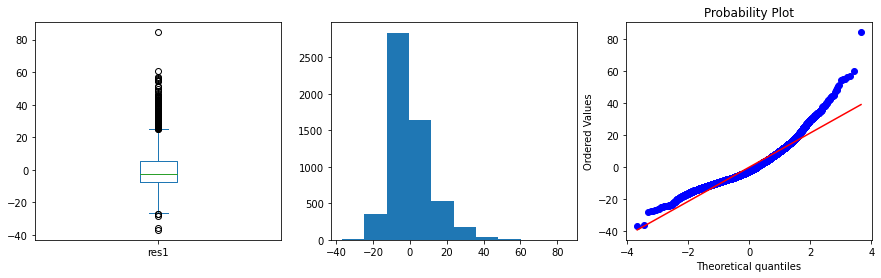

In [7]:
inference.check_normality(room_4.res1)

**Due to the suspicion regarding whether the data follows a normal distribution, we employ the Kruskal-Wallis test.**

Kruskal-Wallis test is a non-parametric test suitable for situations where data does not meet the assumptions of normality and homogeneity of variances. 

Kruskal-Wallis statistic (typically denoted as H) is calculated by the following formula:
$$
H = \frac{12}{N(N+1)} \sum_{i=1}^k \frac{R_i^2}{n_i} - 3(N+1)
$$
H is the Kruskal-Wallis statistic, k is the number of groups, Ri is the sum of ranks for the i-th group, ni is the sample size for the i-th group, and N is the total sample size of all samples.

Calculate the p-value of the Kruskal-Wallis statistic to determine whether to reject the null hypothesis. The p-value represents the probability of observing the statistic or a more extreme statistic under the assumption that the null hypothesis is true.

If the p-value is less than the significance level (typically set at 0.05), we reject the null hypothesis, indicating that the population distributions of at least one group are different from the others. Otherwise, we fail to reject the null hypothesis, suggesting that the population distributions of all groups are the same.

In [8]:
data1=room_4[room_4.region=='east'].price_sm_remaining_lease
data2=room_4[room_4.region=='west'].price_sm_remaining_lease
data3=room_4[room_4.region=='north'].price_sm_remaining_lease
data4=room_4[room_4.region=='central'].price_sm_remaining_lease
data5=room_4[room_4.region=='north-east'].price_sm_remaining_lease

In [9]:
statistic, p_value = stats.kruskal(data1,data2,data3,data4,data5)
print("Kruskal-Wallis statistic:", statistic)
print("p-value:", p_value)
alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: the mean resale price per square metre per year of remaining lease of 4 ROOM flats for all geographical regions are not the same.")
else:
    print("Accept the null hypothesis: the mean resale price per square metre per year of remaining lease of 4 ROOM flats for all geographical regions are the same")

Kruskal-Wallis statistic: 2582.6183509284797
p-value: 0.0
Reject the null hypothesis: the mean resale price per square metre per year of remaining lease of 4 ROOM flats for all geographical regions are not the same.


**Question1.2**

In [10]:
data_drop=data_total[(data_total['flat_type']!='1 ROOM')&(data_total['flat_type']!='MULTI-GENERATION')&(data_total['month']>='2022-07')&(data_total['month']<='2022-12')]

In [11]:
tab = pd.crosstab(data_drop.flat_type, data_drop.region) 
tab

region,central,east,north,north-east,west
flat_type,,,,,
2 ROOM,48,19,84,67,38
3 ROOM,1036,483,484,666,611
4 ROOM,948,711,1199,1635,1229
5 ROOM,450,491,624,977,806
EXECUTIVE,74,251,179,180,270


In [12]:
chi2, p, dof, exp = stats.chi2_contingency(tab, correction = True)
alpha = 0.05
print("chi2 statistic:", chi2)
print("p-value:", p)
if p < alpha:
    print("Reject the null hypothesis: the overall distributions of these groups are not the same.")
else:
    print("Accept the null hypothesis: the overall distributions of these groups are the same.")

chi2 statistic: 734.1655738392806
p-value: 6.874279549042282e-146
Reject the null hypothesis: the overall distributions of these groups are not the same.


# Question 2

The secretary problem *in its simplest form* has the following features.

1. There is one secretarial position available.
2. The number $n$ of applicants is known.
3. The applicants are interviewed sequentially in random order, each order being equally likely.
4. It is assumed that you can rank all the applicants from best to worst without tties. The decision to accept or reject an applicant must be based only on the relative ranks of those applicants interviewed so far.
5. An applicant once rejected cannot later be recalled.
6. You are very particular and will be satisfied with nothing but the ver best.

This basic problem has a remarkably simple solution. First, one shows that attention can be restricted to the class of rules that for some integer $r \ge 1$ rejects the first $r - 1$ applicants, and then chooses the next applicant who is best in the relative ranking of the observed applicants. For such a rule, the probability, $p_n(r)$, of selecting the best applicant is $1/n$ for $r = 1$, and for $r > 1$,
\begin{equation}
  p_n(r) = \frac{r - 1}{n} \sum_{i=r}^n \frac{1}{i - 1}.
\end{equation}
The optimal $r$ is the one that maximises this probability. For small values of $n$, the optimal $r$ can easily be computed. For example, when $n = 11$, the function $p_n(r)$ takes on its maximum value when $r = 5$.

When $n = 11$ and using the optimal solution outlined above, use **simulation** to answer the following questions:

1. What is the probability that you **could not find an acceptable applicant?**
2. How many applicants do you expect to interview **by the time you accept an applicant?**

**Answer:**

**According to the optimal solution outlined above, when $n = 11$, the function $p_n(r)$ takes on its maximum value when $r = 5$.**
**Therefore, the rankings of the first four interviewees can be used as a reference, and the selection process will start from the fifth candidate, choosing the currently encountered relative top-performing applicant.**

In [13]:
import random

def siminterviews(simulations, n, r):
    success=0
    interviews=0
    for i in range(simulations):
        applicants=list(range(1, n+1))
        random.shuffle(applicants)                     # Shuffle the list to simulate random order
        applicants_seen=applicants[:r-1]       
        for j in range(r-1, n):
            if applicants[j]>max(applicants_seen):
                if applicants[j]==n:                   # Found the best applicant
                    success+=1
                interviews+=(j + 1)
                break
    return success, interviews

simulations=10000
n=11
r=5

success, interviews=siminterviews(simulations, n, r)
unacceptable_probability=1-(success/simulations)
expected_applicants=(r-1)+interviews/simulations       # Include the first four interviewees as benchmarks for assessing competency
print(f"Probability of not finding an acceptable applicant: {unacceptable_probability:.4f}")
print(f"Expected number of applicants interviewed before accepting: {expected_applicants:.4f}")

Probability of not finding an acceptable applicant: 0.6062
Expected number of applicants interviewed before accepting: 8.4018
